In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
import altair as alt
from vega_datasets import data

#defining paths
allAlgorithms_unigram_900terms = './boxplotH4new.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'


dataBinary = pd.read_csv(allAlgorithms_unigram_900terms)
#dataClassifier = pd.read_csv(classifierChain)

In [2]:
dataBinary

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,Hypothesis
0,58:19.9,"(1, 1)",900,Yes,0.2,RandomForest,0.161972,23,0.838028,0.726639,0.165493,0.517684,0.500000,0.699752,0.636569,0.666667,0,NaN
1,58:21.2,"(1, 1)",900,Yes,0.2,RandomForest,0.091549,13,0.908451,0.654757,0.183099,0.457070,0.450704,0.646465,0.598131,0.621359,1,NaN
2,58:22.6,"(1, 1)",900,Yes,0.2,RandomForest,0.091549,13,0.908451,0.660442,0.183685,0.465118,0.456597,0.626190,0.627685,0.626937,2,NaN
3,58:24.0,"(1, 1)",900,Yes,0.2,RandomForest,0.112676,16,0.887324,0.669685,0.181925,0.468195,0.464594,0.652913,0.616972,0.634434,3,NaN
4,58:25.3,"(1, 1)",900,Yes,0.2,RandomForest,0.154930,22,0.845070,0.708615,0.164906,0.513400,0.501773,0.711055,0.630290,0.668241,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,54:09.9,"(1, 1)",90,Yes,0.2,RandomForest,0.112676,16,0.887324,0.674806,0.191901,0.445409,0.439108,0.630542,0.591224,0.610250,5,NaN
76,54:10.9,"(1, 1)",90,Yes,0.2,RandomForest,0.119718,17,0.880282,0.659025,0.186033,0.477188,0.453448,0.677835,0.578022,0.623962,6,NaN
77,54:12.0,"(1, 1)",90,Yes,0.2,RandomForest,0.147887,21,0.852113,0.612647,0.193662,0.420643,0.410714,0.611702,0.555556,0.582278,7,NaN
78,54:13.1,"(1, 1)",90,Yes,0.2,RandomForest,0.091549,13,0.908451,0.631100,0.180751,0.444433,0.451957,0.633416,0.612048,0.622549,8,NaN


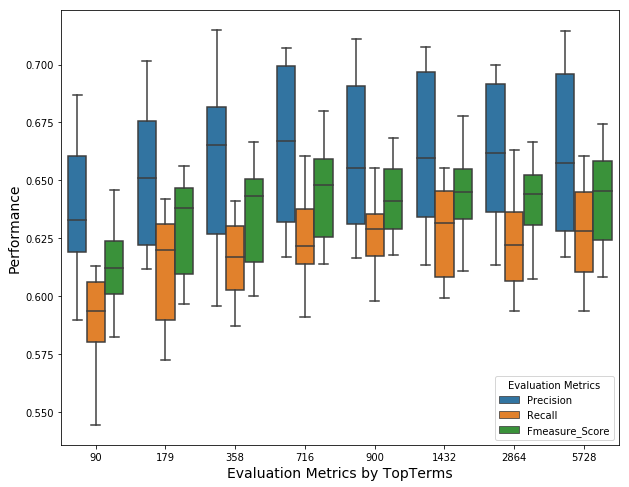

In [42]:
dd=pd.melt(dataBinary,id_vars=['#_TopTerms'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='#_TopTerms',data=dd,hue='Evaluation Metrics')
#ax = sns.boxplot(y='value',x='Hypothesis',data=dd)
plt.ylabel("Performance", size=14)
plt.xlabel("Evaluation Metrics by TopTerms",size=14)

labels=["Precision", "Recall", "F-measure"]
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.title("Evaluation Metrics by Hypothesis", size=12)
plt.savefig("BaselinexH4TopTerms.pdf")
plt.show()


In [4]:
dataBinary.groupby(['#_TopTerms']).mean()

,Train/Test_Size,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,Hypothesis
#_TopTerms,,,,,,,,,,,,,
90,0.2,0.116197,16.5,0.883803,0.647580,0.186678,0.445082,0.441165,0.638654,0.588421,0.611990,4.5,NaN
179,0.2,0.117606,16.7,0.882394,0.658622,0.179460,0.468120,0.460425,0.651589,0.611174,0.630216,4.5,NaN
358,0.2,0.126056,17.9,0.873944,0.662149,0.176995,0.475939,0.465822,0.657088,0.615789,0.635241,4.5,NaN
716,0.2,0.121831,17.3,0.878169,0.671730,0.172770,0.483068,0.475947,0.665373,0.626032,0.644628,4.5,NaN
900,0.2,0.117606,16.7,0.882394,0.672314,0.174648,0.480039,0.473269,0.660391,0.626121,0.642258,4.5,NaN
1432,0.2,0.116197,16.5,0.883803,0.673375,0.173592,0.482103,0.475592,0.662498,0.628177,0.644339,4.5,NaN
2864,0.2,0.110563,15.7,0.889437,0.672261,0.174765,0.478117,0.472021,0.660840,0.623406,0.641079,4.5,NaN
5728,0.2,0.116901,16.6,0.883099,0.673909,0.173885,0.481350,0.474622,0.662027,0.626710,0.643371,4.5,NaN


In [5]:
dataBinary.nlargest(5,['Precision','Fmeasure_Score'])

,date_time,tf-IDF,#_TopTerms,Stop_Word,Train/Test_Size,Algorithm,Accuracy_Score,Accuracy_Score_not_normalized,zero_one_loss,AUC-PR,hamming_loss_avg,Jaccard_samples,Jaccard_macro,Precision,Recall,Fmeasure_Score,i,Hypothesis
56,53:49.3,"(1, 1)",358,Yes,0.2,RandomForest,0.140845,20,0.859155,0.680709,0.169601,0.503840,0.488496,0.715026,0.606593,0.656361,6,NaN
14,52:50.8,"(1, 1)",5728,Yes,0.2,RandomForest,0.161972,23,0.838028,0.712251,0.163146,0.521638,0.506217,0.714286,0.634744,0.672170,4,NaN
4,58:25.3,"(1, 1)",900,Yes,0.2,RandomForest,0.154930,22,0.845070,0.708615,0.164906,0.513400,0.501773,0.711055,0.630290,0.668241,4,NaN
30,53:15.5,"(1, 1)",1432,Yes,0.2,RandomForest,0.147887,21,0.852113,0.718153,0.160798,0.521862,0.512456,0.707617,0.650113,0.677647,0,NaN
40,53:30.3,"(1, 1)",716,Yes,0.2,RandomForest,0.161972,23,0.838028,0.728040,0.160211,0.528938,0.515098,0.707317,0.654628,0.679953,0,NaN


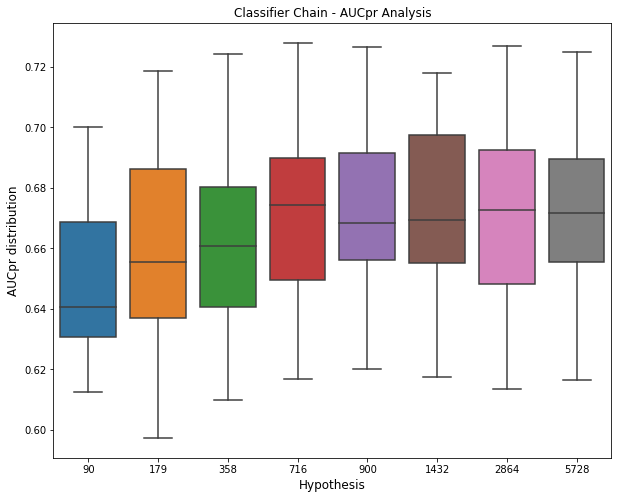

In [6]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='#_TopTerms',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - AUCpr Analysis", size=12)
plt.show()


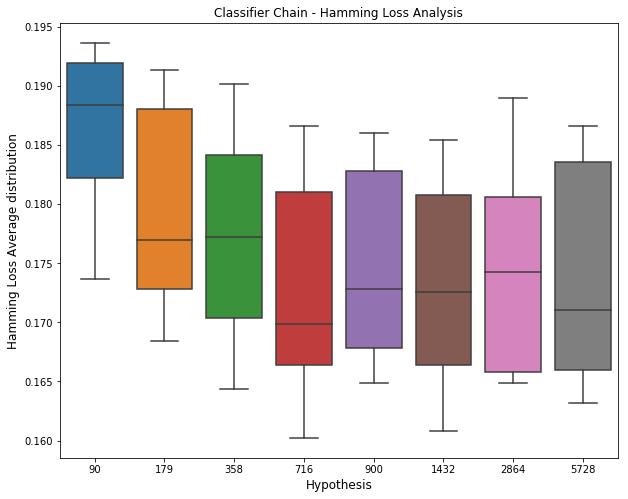

In [7]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='#_TopTerms',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - Hamming Loss Analysis", size=12)
plt.show()

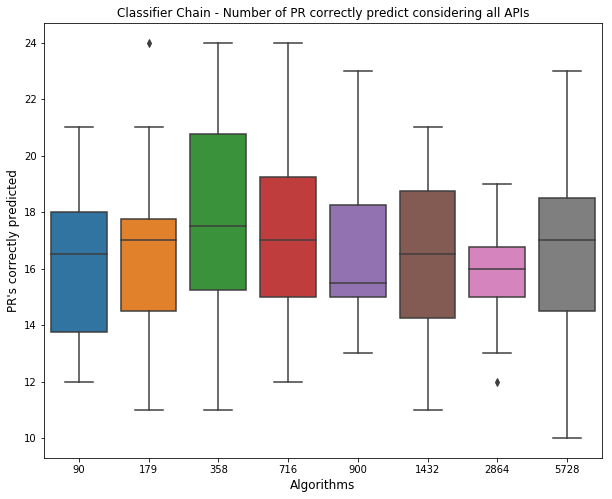

In [8]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='#_TopTerms',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [19]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [20]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [31]:
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary['#_TopTerms'] == 900]
Baseline_FMeasure = Baseline_binary['Fmeasure_Score']

H4_binary90 = dataBinary[dataBinary['#_TopTerms'] == 90]
H4_FMeasure90 = H4_binary90['Fmeasure_Score']

H4_binary179 = dataBinary[dataBinary['#_TopTerms'] == 179]
H4_FMeasure179 = H4_binary179['Fmeasure_Score']

H4_binary358 = dataBinary[dataBinary['#_TopTerms'] == 358]
H4_FMeasure358 = H4_binary358['Fmeasure_Score']

H4_binary716 = dataBinary[dataBinary['#_TopTerms'] == 716]
H4_FMeasure716 = H4_binary716['Fmeasure_Score']

H4_binary1432 = dataBinary[dataBinary['#_TopTerms'] == 1432]
H4_FMeasure1432 = H4_binary1432['Fmeasure_Score']

H4_binary2864 = dataBinary[dataBinary['#_TopTerms'] == 2864]
H4_FMeasure2864 = H4_binary2864['Fmeasure_Score']

H4_binary5728 = dataBinary[dataBinary['#_TopTerms'] == 5728]
H4_FMeasure5728 = H4_binary5728['Fmeasure_Score']




In [32]:
print(Baseline_FMeasure,H4_FMeasure90,H4_FMeasure179,H4_FMeasure358,H4_FMeasure716,H4_FMeasure1432,H4_FMeasure2864,H4_FMeasure5728)

0    0.666667
1    0.621359
2    0.626937
3    0.634434
4    0.668241
5    0.657074
6    0.647128
7    0.617612
8    0.647922
9    0.635204
Name: Fmeasure_Score, dtype: float64 70    0.645933
71    0.589128
72    0.600733
73    0.613932
74    0.629847
75    0.610250
76    0.623962
77    0.582278
78    0.622549
79    0.601290
Name: Fmeasure_Score, dtype: float64 60    0.656287
61    0.601227
62    0.604878
63    0.636150
64    0.651921
65    0.648019
66    0.640382
67    0.596535
68    0.642247
69    0.624516
Name: Fmeasure_Score, dtype: float64 50    0.666667
51    0.613886
52    0.611650
53    0.642353
54    0.643868
55    0.650000
56    0.656361
57    0.600000
58    0.650873
59    0.616751
Name: Fmeasure_Score, dtype: float64 40    0.679953
41    0.614078
42    0.621524
43    0.640662
44    0.661137
45    0.660264
46    0.656506
47    0.619165
48    0.655130
49    0.637865
Name: Fmeasure_Score, dtype: float64 30    0.677647
31    0.622596
32    0.633333
33    0.640187
34    0.655621


In [33]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
#stat, p = kruskal(Baseline_FMeasure,H4_FMeasure90,H4_FMeasure179,H4_FMeasure358,H4_FMeasure716,H4_FMeasure1432,H4_FMeasure5728)
stat, p = kruskal(Baseline_FMeasure,H4_FMeasure90,H4_FMeasure179,H4_FMeasure358,H4_FMeasure716,H4_FMeasure1432,H4_FMeasure2864,H4_FMeasure5728)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=14.599, p=0.041
Different distributions (reject H0)


In [34]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
#stat, p = friedmanchisquare(Baseline_FMeasure,H4_FMeasure90,H4_FMeasure179,H4_FMeasure358,H4_FMeasure716,H4_FMeasure1432,H4_FMeasure5728)
stat, p = friedmanchisquare(Baseline_FMeasure,H4_FMeasure90,H4_FMeasure179,H4_FMeasure358,H4_FMeasure716,H4_FMeasure1432,H4_FMeasure2864,H4_FMeasure5728)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=46.552, p=0.000
Different distributions (reject H0)


In [ ]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure,H4_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   



In [36]:
#Effect_Size RandomForest Vs others   
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure90))
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure179))
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure358))
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure716)) #divisionByZero error
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure1432))
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure2864)) #divisionByZero error
print(cliffsDelta(Baseline_FMeasure, H4_FMeasure5728))

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(H4_FMeasure90, H4_FMeasure179))
print(cliffsDelta(H4_FMeasure90, H4_FMeasure358))
print(cliffsDelta(H4_FMeasure90, H4_FMeasure716))
print(cliffsDelta(H4_FMeasure90, H4_FMeasure1432))
print(cliffsDelta(H4_FMeasure90, H4_FMeasure2864))
print(cliffsDelta(H4_FMeasure90, H4_FMeasure5728))

#Effect_Size MLPC Vs others
print(cliffsDelta(H4_FMeasure179, H4_FMeasure358))
print(cliffsDelta(H4_FMeasure179, H4_FMeasure716))
print(cliffsDelta(H4_FMeasure179, H4_FMeasure1432))
print(cliffsDelta(H4_FMeasure179, H4_FMeasure2864))
print(cliffsDelta(H4_FMeasure179, H4_FMeasure5728))

#Effect_Size MlkNN Vs others
print(cliffsDelta(H4_FMeasure358,H4_FMeasure716))
print(cliffsDelta(H4_FMeasure358,H4_FMeasure1432))
print(cliffsDelta(H4_FMeasure358,H4_FMeasure2864))
print(cliffsDelta(H4_FMeasure358,H4_FMeasure5728))

print(cliffsDelta(H4_FMeasure716,H4_FMeasure1432))
print(cliffsDelta(H4_FMeasure716,H4_FMeasure2864))
print(cliffsDelta(H4_FMeasure716,H4_FMeasure5728))

print(cliffsDelta(H4_FMeasure1432,H4_FMeasure2864))
print(cliffsDelta(H4_FMeasure1432,H4_FMeasure5728))

print(cliffsDelta(H4_FMeasure2864,H4_FMeasure5728))


(0.76, 'large')
(0.24, 'small')
(0.21, 'small')
(-0.06, 'negligible')
(-0.05, 'negligible')
(0.03, 'negligible')
(-0.06, 'negligible')
(-0.48, 'large')
(-0.52, 'large')
(-0.72, 'large')
(-0.78, 'large')
(-0.72, 'large')
(-0.68, 'large')
(-0.2, 'small')
(-0.38, 'medium')
(-0.3, 'small')
(-0.3, 'small')
(-0.32, 'small')
(-0.28, 'small')
(-0.17, 'small')
(-0.13, 'negligible')
(-0.24, 'small')
(0.06, 'negligible')
(0.08, 'negligible')
(0.09, 'negligible')
(0.09, 'negligible')
(0.04, 'negligible')
(-0.08, 'negligible')


In [ ]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

In [ ]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [ ]:
###Precision analysis
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Hypothesis == 'Baseline']
Baseline_Precision = Baseline_binary['Precision']

H4_binary = dataBinary[dataBinary.Hypothesis == 'H4']
H4_Precision = H4_binary['Precision']



In [38]:
Baseline_binaryP = dataBinary[dataBinary['#_TopTerms'] == 900]
Baseline_Precision = Baseline_binaryP['Precision']

H4_binary90 = dataBinary[dataBinary['#_TopTerms'] == 90]
H4_Precision90 = H4_binary90['Precision']

H4_binary179 = dataBinary[dataBinary['#_TopTerms'] == 179]
H4_Precision179 = H4_binary179['Precision']

H4_binary358 = dataBinary[dataBinary['#_TopTerms'] == 358]
H4_Precision358 = H4_binary358['Precision']

H4_binary716 = dataBinary[dataBinary['#_TopTerms'] == 716]
H4_Precision716 = H4_binary716['Precision']

H4_binary1432 = dataBinary[dataBinary['#_TopTerms'] == 1432]
H4_Precision1432 = H4_binary1432['Precision']

H4_binary2864 = dataBinary[dataBinary['#_TopTerms'] == 2864]
H4_Precision2864 = H4_binary2864['Precision']

H4_binary5728 = dataBinary[dataBinary['#_TopTerms'] == 5728]
H4_Precision5728 = H4_binary5728['Precision']


In [ ]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H4_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

   


In [39]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
#stat, p = kruskal(Baseline_Precision,H4_Precision90,H4_Precision179,H4_Precision358,H4_Precision716,H4_Precision1432,H4_Precision5728)
stat, p = kruskal(Baseline_Precision,H4_Precision90,H4_Precision179,H4_Precision358,H4_Precision716,H4_Precision1432,H4_Precision2864,H4_Precision5728)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=4.655, p=0.702
Same distributions (fail to reject H0)


In [40]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
#stat, p = friedmanchisquare(Baseline_Precision,H4_Precision90,H4_Precision179,H4_Precision358,H4_Precision716,H4_Precision1432,H4_Precision5728)
stat, p = friedmanchisquare(Baseline_Precision,H4_Precision90,H4_Precision179,H4_Precision358,H4_Precision716,H4_Precision1432,H4_Precision2864,H4_Precision5728)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


Statistics=31.508, p=0.000
Different distributions (reject H0)


In [41]:
#Effect_Size RandomForest Vs others   
print(cliffsDelta(Baseline_Precision, H4_Precision90))
print(cliffsDelta(Baseline_Precision, H4_Precision179))
print(cliffsDelta(Baseline_Precision, H4_Precision358))
print(cliffsDelta(Baseline_Precision, H4_Precision716)) #divisionByZero error
print(cliffsDelta(Baseline_Precision, H4_Precision1432))
print(cliffsDelta(Baseline_Precision, H4_Precision2864)) #divisionByZero error
print(cliffsDelta(Baseline_Precision, H4_Precision5728))

#Effect_Size LogisticRegression Vs others
print(cliffsDelta(H4_Precision90, H4_Precision179))
print(cliffsDelta(H4_Precision90, H4_Precision358))
print(cliffsDelta(H4_Precision90, H4_Precision716))
print(cliffsDelta(H4_Precision90, H4_Precision1432))
print(cliffsDelta(H4_Precision90, H4_Precision2864))
print(cliffsDelta(H4_Precision90, H4_Precision5728))

#Effect_Size MLPC Vs others
print(cliffsDelta(H4_Precision179, H4_Precision358))
print(cliffsDelta(H4_Precision179, H4_Precision716))
print(cliffsDelta(H4_Precision179, H4_Precision1432))
print(cliffsDelta(H4_Precision179, H4_Precision2864))
print(cliffsDelta(H4_Precision179, H4_Precision5728))

#Effect_Size MlkNN Vs others
print(cliffsDelta(H4_Precision358,H4_Precision716))
print(cliffsDelta(H4_Precision358,H4_Precision1432))
print(cliffsDelta(H4_Precision358,H4_Precision2864))
print(cliffsDelta(H4_Precision358,H4_Precision5728))

print(cliffsDelta(H4_Precision716,H4_Precision1432))
print(cliffsDelta(H4_Precision716,H4_Precision2864))
print(cliffsDelta(H4_Precision716,H4_Precision5728))

print(cliffsDelta(H4_Precision1432,H4_Precision2864))
print(cliffsDelta(H4_Precision1432,H4_Precision5728))

print(cliffsDelta(H4_Precision2864,H4_Precision5728))


(0.38, 'medium')
(0.18, 'small')
(0.04, 'negligible')
(-0.12, 'negligible')
(-0.02, 'negligible')
(0.01, 'negligible')
(-0.04, 'negligible')
(-0.22, 'small')
(-0.28, 'small')
(-0.4, 'medium')
(-0.39, 'medium')
(-0.42, 'medium')
(-0.4, 'medium')
(-0.12, 'negligible')
(-0.28, 'small')
(-0.22, 'small')
(-0.2, 'small')
(-0.22, 'small')
(-0.14, 'negligible')
(-0.08, 'negligible')
(-0.05, 'negligible')
(-0.08, 'negligible')
(0.04, 'negligible')
(0.14, 'negligible')
(0.09, 'negligible')
(0.07, 'negligible')
(0.01, 'negligible')
(-0.06, 'negligible')


In [ ]:
#Effect_Size RandomForest Vs others   
print(cliffsDelta(Baseline_Precision, H4_Precision))
#print(cliffsDelta(RF_Precision, MLPC_Precision))
#print(cliffsDelta(RF_Precision, DT_Precision))
#print(cliffsDelta(RF_Precision, MlkNN_Precision)) #divisionByZero error

#Effect_Size LogisticRegression Vs others
#print(cliffsDelta(LogisticRegression_Precision, MLPC_Precision))
#print(cliffsDelta(LogisticRegression_Precision, DT_Precision))
#print(cliffsDelta(LogisticRegression_Precision, MlkNN_Precision))

#Effect_Size MLPC Vs others
#print(cliffsDelta(MLPC_Precision, DT_Precision))
#print(cliffsDelta(MLPC_Precision, MlkNN_Precision))

#Effect_Size MlkNN Vs others
#print(cliffsDelta(MlkNN_Precision,DT_Precision))


In [ ]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

In [ ]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')